# Introductory examples

## 1.usa.gov data from bit.ly

In [1]:
### import used packages in this chapter

# built-in package
from __future__ import division
import json
import collections

# third package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn
import mpld3
# user defined package

# package related config
%matplotlib inline

In [2]:
!pwd
!ls

/Users/chenshan/Desktop/github/data-science/books_courses/Python for Data Analysis
ch02       ch02.ipynb


In [3]:
filepath = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [4]:
# explore the file content format
!head -2 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }
{ "a": "GoogleMaps\/RochesterNY", "c": "US", "nk": 0, "tz": "America\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\/\/www.AwareMap.com\/", "u": "http:\/\/www.monroecounty.gov\/etc\/911\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }


In [5]:
# load file content into a list
records = [json.loads(line) for line in open(filepath)]

In [6]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

### Counting time zones with pandas

In [7]:
data = pd.DataFrame(records)
data.head(2)

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php


In [13]:
tz = data['tz']
tz[:15]
### Attention, there are two kinds of missing value,
# 1. NaN, such as index=13
# 2. empty string, such as index=7,8,9

0        America/New_York
1          America/Denver
2        America/New_York
3       America/Sao_Paulo
4        America/New_York
5        America/New_York
6           Europe/Warsaw
7                        
8                        
9                        
10    America/Los_Angeles
11       America/New_York
12       America/New_York
13                    NaN
14       America/New_York
Name: tz, dtype: object

In [9]:
tz_count = tz.value_counts() # Returns object containing counts of unique values.
tz_count[:5]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
dtype: int64

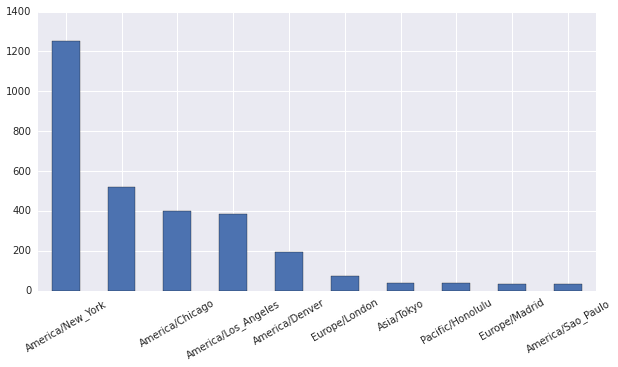

In [10]:
tz_count[:10].plot(kind='bar', rot=30, figsize=(10, 5))
# mpld3.display()

In [15]:
# deal with missing value
clean_tz = tz.fillna(value='Missing')
clean_tz[clean_tz == ''] = 'Unknown'
clean_tz[:15]

0        America/New_York
1          America/Denver
2        America/New_York
3       America/Sao_Paulo
4        America/New_York
5        America/New_York
6           Europe/Warsaw
7                 Unknown
8                 Unknown
9                 Unknown
10    America/Los_Angeles
11       America/New_York
12       America/New_York
13                Missing
14       America/New_York
Name: tz, dtype: object

In [16]:
clean_tz_counts = clean_tz.value_counts()
clean_tz_counts[:5]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
dtype: int64

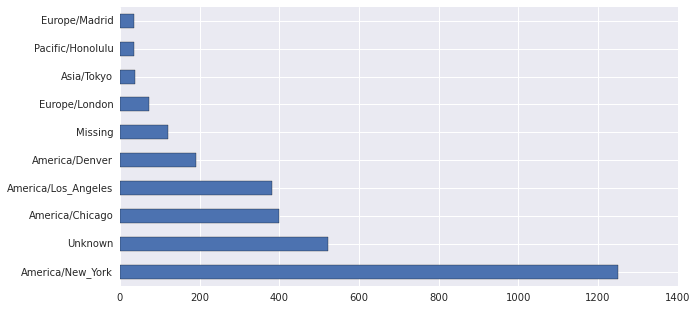

In [18]:
clean_tz_counts[:10].plot(kind='barh', rot=0, figsize=(10, 5))

### Counting browser client

In [122]:
data.head(2)

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php


In [123]:
browser = data.a
browser[:5]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [124]:
browser = pd.Series([each.split()[0] for each in browser.dropna()])  # trans list to Series can be very helpful fo analysis
browser[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [116]:
browser.value_counts()[:5]

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
dtype: int64

In [127]:
client = data[data.a.notnull()]
client.head(2)

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php


In [145]:
operation_system = np.where(client['a'].str.contains('Windows'), 'Windows', 'Not Windows')
operation_system = pd.Series(operation_system)
operation_system[:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
dtype: object

In [146]:
by_tz_os = client.groupby(['tz', operation_system]) # I think operation_system is play as a Window function here

In [147]:
aggregation_count = by_tz_os.size().unstack().fillna(0)
aggregation_count[:5]

,Not Windows,Windows
tz,,
,180,316
Africa/Cairo,1,2
Africa/Casablanca,0,1
Africa/Ceuta,1,1
Africa/Johannesburg,0,1


In [148]:
# select the top overall time zones
indexer = aggregation_count.sum(1).argsort()
indexer[:5]

tz
                       21
Africa/Cairo           51
Africa/Casablanca      52
Africa/Ceuta           36
Africa/Johannesburg    53
dtype: int64

In [149]:
count_subset = aggregation_count.take(indexer)
count_subset[-10:]

,Not Windows,Windows
tz,,
America/Sao_Paulo,12,21
Europe/Madrid,15,19
Pacific/Honolulu,10,25
Asia/Tokyo,14,23
Europe/London,32,40
America/Denver,56,125
America/Los_Angeles,122,247
America/Chicago,131,249
,180,316


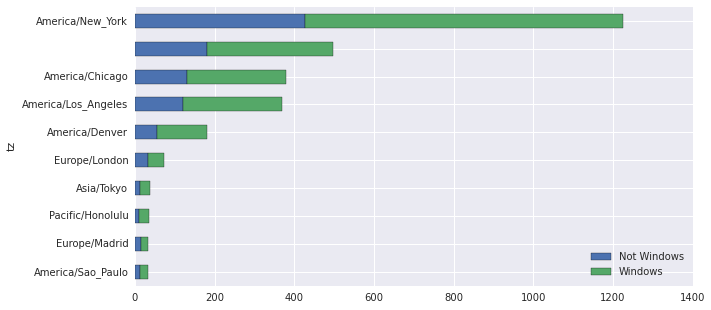

In [155]:
count_subset[-10:].plot(kind='barh', stacked=True, figsize=(10, 5))

In [157]:
normal_subset = count_subset.div(count_subset.sum(1), axis=0)
normal_subset[-10:]

,Not Windows,Windows
tz,,
America/Sao_Paulo,0.363636,0.636364
Europe/Madrid,0.441176,0.558824
Pacific/Honolulu,0.285714,0.714286
Asia/Tokyo,0.378378,0.621622
Europe/London,0.444444,0.555556
America/Denver,0.309392,0.690608
America/Los_Angeles,0.330623,0.669377
America/Chicago,0.344737,0.655263
,0.362903,0.637097


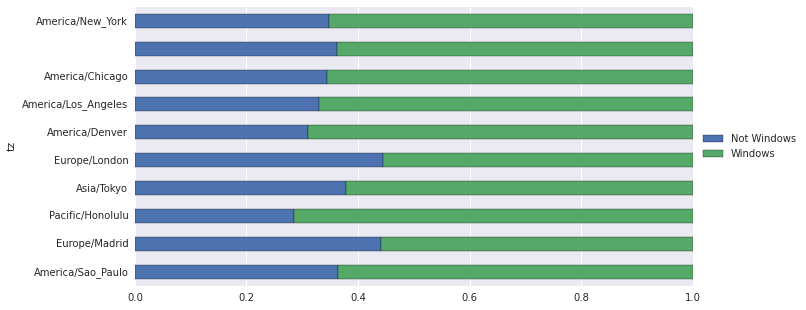

In [176]:
ax = normal_subset[-10:].plot(kind='barh', stacked=True, figsize=(10, 5), legend=False)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

### Movie data analysis

In [185]:
!head -5 'ch02/movielens/users.dat' | column -t -s '::'

1  F  1   10  48067
2  M  56  16  70072
3  M  25  15  55117
4  M  45  7   02460
5  M  25  20  55455


In [186]:
!head -5 'ch02/movielens/movies.dat' | column -t -s '::'

1  Toy Story (1995)                    Animation|Children's|Comedy
2  Jumanji (1995)                      Adventure|Children's|Fantasy
3  Grumpier Old Men (1995)             Comedy|Romance
4  Waiting to Exhale (1995)            Comedy|Drama
5  Father of the Bride Part II (1995)  Comedy


In [189]:
!head -5 'ch02/movielens/ratings.dat' | column -t -s '::'

1  1193  5  978300760
1  661   3  978302109
1  914   3  978301968
1  3408  4  978300275
1  2355  5  978824291


In [194]:
user_names = ['user_id', 'gender', 'age', 'occupation', 'zipcode']
users = pd.read_table('ch02/movielens/users.dat', sep='::', header=None, names=user_names, engine='python')
users.head(2)

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072


In [195]:
movie_names = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None, names=movie_names, engine='python')
movies.head(2)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


In [199]:
rating_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ch02/movielens/ratings.dat', sep='::', header=None, names=rating_names, engine='python')
print 'records: ', len(ratings)
ratings.head(2)

records:  1000209


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109


In [200]:
# format explanation
!cat 'ch02/movielens/README'

SUMMARY

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

USAGE LICENSE

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under the following conditions:

     * The user may not state or imply any endorsement from the
       University of Minnesota or the GroupLens Research Group.

     * The user must acknowledge the use of the data set in
       publications resulting from the use of the data set, and must
       send us an electronic or paper copy of those publications.

     * The user may not redistribute the data without separate
       permission.

     * The user may not use this information for any commercial or
       revenue-bearing purposes without first obtaining 

In [202]:
# merge user, rating and movie into one table to do analysis
data = pd.merge(pd.merge(users, ratings, on='user_id'), movies, on='movie_id')

In [204]:
data.head(2)

,user_id,gender,age,occupation,zipcode,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama


In [212]:
# you should realize the pros and cons to merge data into one data frame
# pros: easy on analysing
# cons: need more space
# see, 83.9 MB >> 283.1 kb + 38.2 MB + 121.3 KB
print 'merged data: \n', data.info()
print 'user data: \n', users.info()
print 'rating data: \n', ratings.info()
print 'movie data: \n', movies.info()

merged data: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zipcode       1000209 non-null object
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB
None
user data: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zipcode       6040 non-null object
dtypes: int64(3), object(2)
memory usage: 283.1+ KB
None
rating data: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Da

In [222]:
# get mean rating for each movie grouped by gender
mean_ratings = data.pivot_table(values='rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [230]:
rating_times = data.groupby('title').size()
rating_times[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [232]:
rating_times.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
dtype: float64

In [233]:
# so I think we can recognize those movies which has 200-250 rating times as activity/popular movies
activity_movie = rating_times[rating_times > 200]
activity_movie[:5]

title
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [239]:
active_mean_ratings = mean_ratings.ix[activity_movie.index]
active_mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [248]:
# select the top films women most favor
top_female_rate_movies = active_mean_ratings.sort_index(by='F', ascending=False)
top_female_rate_movies[:5]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
"General, The (1927)",4.575758,4.329480
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075


In [249]:
# figure out which movies have the most disagreement between men and female
active_mean_ratings['diff'] = active_mean_ratings['F'] - active_mean_ratings['M']
top_disgreement = active_mean_ratings.sort_index(by='diff', ascending=False)
top_disgreement[:5]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",3.486842,2.795276,0.691567
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Grease (1978),3.975265,3.367041,0.608224
"Relic, The (1997)",3.309524,2.723077,0.586447


In [253]:
# get the top list which man like and woman not that like
top_disgreement[::-1][:5]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,-0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,-0.676359
Up in Smoke (1978),2.944444,3.585227,-0.640783
Dumb & Dumber (1994),2.697987,3.336595,-0.638608
"Longest Day, The (1962)",3.411765,4.031447,-0.619682


In [255]:
### Most disagreement among views, independent of gender, can use variance of std
rating_std = data.groupby('title')['rating'].std()
rating_std[:5]

title
$1,000,000 Duck (1971)           1.092563
'Night Mother (1986)             1.118636
'Til There Was You (1997)        1.020159
'burbs, The (1989)               1.107760
...And Justice for All (1979)    0.878110
Name: rating, dtype: float64

In [260]:
rating_std[activity_movie.index].order(ascending=False)[:5]

title
Plan 9 from Outer Space (1958)         1.455998
Texas Chainsaw Massacre, The (1974)    1.332448
Dumb & Dumber (1994)                   1.321333
Blair Witch Project, The (1999)        1.316368
Natural Born Killers (1994)            1.307198
Name: rating, dtype: float64

### U.S. Baby Names from 1880 to 2014

In [262]:
%hist

### import used packages in this chapter

# built-in package
from __future__ import division
import json
import collections

# third package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn
import mpld3
# user defined package

# package related config
%matplotlib inline
!pwd
!ls
filepath = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
# explore the file content format
!head -2 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
# load file content into a list
records = [json.loads(line) for line in open(filepath)]
records[0]
data = pd.DataFrame(records)
data.head(2)
tz = data['tz']
tz[:5]
tz_count = tz.value_counts() # Returns object containing counts of unique values.
tz_count[:5]
tz_count[:10].plot(kind='bar', rot=30, figsize=(10, 5))
# mpld3.display()
tz
tz = data['tz']
tz[:15]
tz = data['tz']
tz[:15]
### Attention, there are two kinds of missing value,
# 1. NaN, such as index=13
# 2. empty string, such as index=7,8,9
# deal with missing value

In [67]:
%matplotlib inline

In [ ]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)

In [130]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
lines = open(path).readlines()
records = [json.loads(line) for line in lines]

In [131]:
from pandas import DataFrame, Series
import pandas as pd

frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


In [132]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [133]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

In [ ]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

In [ ]:
plt.figure(figsize=(10, 4))

In [ ]:
tz_counts[:10].plot(kind='barh', rot=0)

In [134]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [ ]:
frame['a'][50]

In [ ]:
frame['a'][51]

In [135]:
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [136]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [137]:
cframe = frame[frame.a.notnull()]

In [138]:
operating_system = np.where(cframe['a'].str.contains('Windows'),
                            'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [139]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [140]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


In [141]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [142]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


In [143]:
plt.figure()

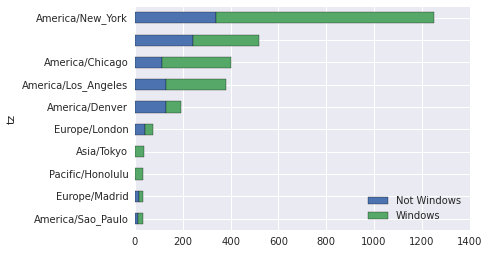

In [144]:
count_subset.plot(kind='barh', stacked=True)

In [ ]:
plt.figure()

In [ ]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

## MovieLens 1M data set

In [ ]:
import pandas as pd
encoding = 'latin1'

upath = os.path.expanduser('movielens/ml-1m/users.dat')
rpath = os.path.expanduser('movielens/ml-1m/ratings.dat')
mpath = os.path.expanduser('movielens/ml-1m/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding)

In [ ]:
users[:5]

In [ ]:
ratings[:5]

In [ ]:
movies[:5]

In [ ]:
ratings

In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
data

In [ ]:
data.ix[0]

In [ ]:
mean_ratings = data.pivot_table('rating', rows='title',
                                cols='gender', aggfunc='mean')
mean_ratings[:5]

In [ ]:
ratings_by_title = data.groupby('title').size()

In [ ]:
ratings_by_title[:5]

In [ ]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [ ]:
active_titles[:10]

In [ ]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

In [ ]:
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

In [ ]:
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False)
top_female_ratings[:10]

### Measuring rating disagreement

In [ ]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [ ]:
sorted_by_diff = mean_ratings.sort_index(by='diff')
sorted_by_diff[:15]

In [ ]:
# Reverse order of rows, take first 15 rows
sorted_by_diff[::-1][:15]

In [ ]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.ix[active_titles]
# Order Series by value in descending order
rating_std_by_title.order(ascending=False)[:10]

### US Baby Names 1880-2010

In [ ]:
from __future__ import division
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 5))
np.set_printoptions(precision=4)
%pwd

http://www.ssa.gov/oact/babynames/limits.html

In [ ]:
!head -n 10 baby_names/names/yob1880.txt

In [ ]:
import pandas as pd
names1880 = pd.read_csv('baby_names/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

In [ ]:
names1880.groupby('sex').births.sum()

In [ ]:
# 2010 is the last available year right now
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'baby_names/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [ ]:
names = pd.read_pickle('baby_names/all_names')

In [ ]:
names

In [ ]:
total_births = names.pivot_table('births', rows='year',
                                 cols='sex', aggfunc=sum)

In [ ]:
total_births.tail()

In [ ]:
total_births.plot(title='Total births by sex and year')

In [ ]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)

    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [ ]:
names

In [ ]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

In [ ]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [ ]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [ ]:
top1000.index = np.arange(len(top1000))

In [ ]:
top1000

### Analyzing naming trends

In [ ]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [ ]:
total_births = top1000.pivot_table('births', rows='year', cols='name',
                                   aggfunc=sum)
total_births

In [ ]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

#### Measuring the increase in naming diversity

In [ ]:
plt.figure()

In [ ]:
table = top1000.pivot_table('prop', rows='year',
                            cols='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [ ]:
df = boys[boys.year == 2010]
df

In [ ]:
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

In [ ]:
prop_cumsum.values.searchsorted(0.5)

In [ ]:
df = boys[boys.year == 1900]
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

In [ ]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [ ]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

In [ ]:
diversity.plot(title="Number of popular names in top 50%")

#### The "Last letter" Revolution

In [ ]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', rows=last_letters,
                          cols=['sex', 'year'], aggfunc=sum)

In [ ]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()
subtable.sum()

In [ ]:
letter_prop = subtable / subtable.sum().astype(float)

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [ ]:
plt.subplots_adjust(hspace=0.25)

In [ ]:
letter_prop = table / table.sum().astype(float)

dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

In [ ]:
plt.close('all')

In [ ]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [ ]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

In [ ]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

In [ ]:
table = filtered.pivot_table('births', rows='year',
                             cols='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

In [ ]:
plt.close('all')

In [ ]:
table.plot(style={'M': 'k-', 'F': 'k--'})